In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import torch
import joblib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [2]:
from env.fetch_reach_mod import FetchReachMod

Initial experiments using a wrapper of the FetchReach environment in Gym. In these experiments I gather data from random trajectories and train a GAN to learn to generate future states 5 time steps into the future. For simplicity, the generated states are simply the position of the gripper (so 3-dimensional)

<img src="setup.png" width="500"/>

# Experiment 1 - WGAN with gradient penalty only - simple architecture

In [4]:
loss_record_1 = joblib.load("results/nearby_states/new_noSN_standarch/losses.pkl")

In [4]:
loss_record_1.keys()

dict_keys(['G', 'big_eval_avg_distance', 'std_distance', 'big_eval_std_distance', 'avg_distance', 'GP', 'D', 'big_eval_avg_nn_distance', 'std_distance_empirical', 'D_tot', 'avg_distance_empirical'])

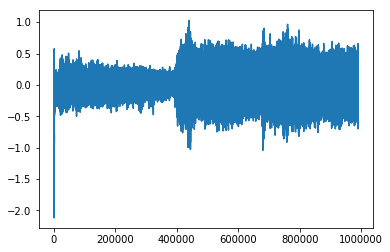

In [5]:
plt.plot(loss_record_1["D"])

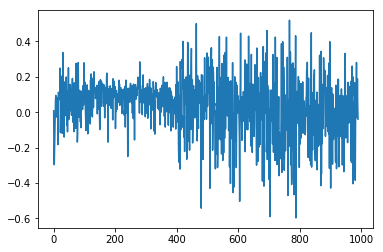

In [9]:
plt.plot(loss_record_1["D"][::1000])

Quite unstable - discriminator loss gets "worse" after a lot of training

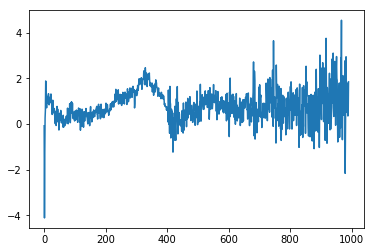

In [11]:
plt.plot(loss_record_1["G"][::200])

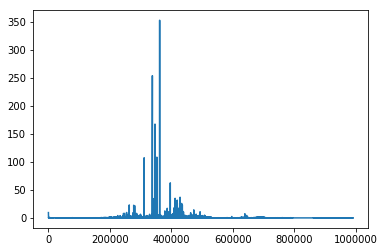

In [7]:
plt.plot(loss_record_1["GP"]) #gradient penalty term in loss

seem to get very large gradient norms sometimes...

### Average distance from state to future state (vs. empirical average baseline)

(0, 1.0)

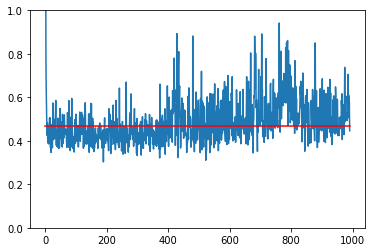

In [16]:
plt.plot(loss_record_1["avg_distance"][::1000])
plt.plot([loss_record_1["avg_distance_empirical"] for _ in range(len(loss_record_1["avg_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

In [17]:
loss_record_1["avg_distance"][0]

1.6171668767929077

at early stages, seems OK, gets worse later on... still, by this measure not doing an awful job

Remember these are normalised distances (with standardscaler)

In [5]:
loss_record_1["big_eval_avg_distance"] #ugh, I forgot to append so only got final result -_-

0.43346938490867615

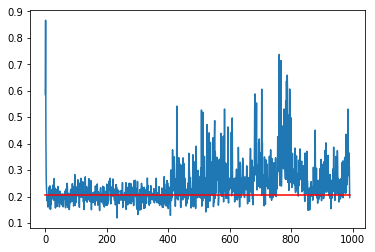

In [22]:
plt.plot(loss_record_1["std_distance"][::1000])
plt.plot([loss_record_1["std_distance_empirical"] for _ in range(len(loss_record_1["std_distance"][::1000]))], c="red")

# second run, same settings as above

In [24]:
loss_record_2 = joblib.load("results/nearby_states/new_noSN_standardarch_2/losses.pkl")

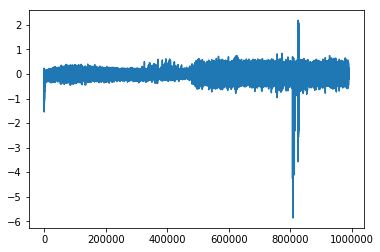

In [26]:
plt.plot(loss_record_2["D"])

(-1, 1)

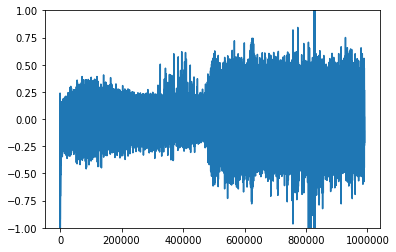

In [27]:
plt.plot(loss_record_2["D"])
plt.ylim([-1,1])

does essentially the same thing... but seems even more unstable

(-1, 1)

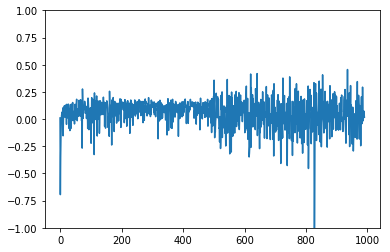

In [28]:
plt.plot(loss_record_2["D"][::1000])
plt.ylim([-1,1])

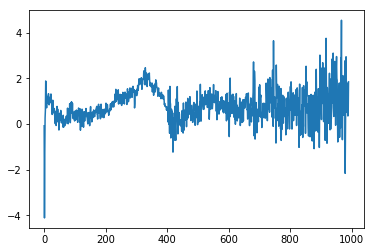

In [30]:
plt.plot(loss_record_1["G"][::200])

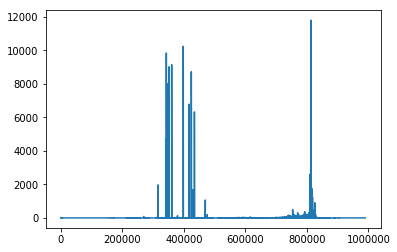

In [31]:
plt.plot(loss_record_2["GP"])

insanely high sometimes!!

(0, 1.0)

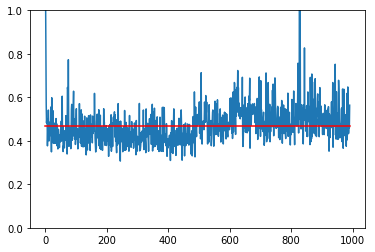

In [32]:
plt.plot(loss_record_2["avg_distance"][::1000])
plt.plot([loss_record_2["avg_distance_empirical"] for _ in range(len(loss_record_2["avg_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

(0, 1.0)

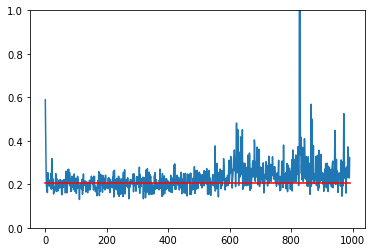

In [35]:
plt.plot(loss_record_2["std_distance"][::1000])
plt.plot([loss_record_2["std_distance_empirical"] for _ in range(len(loss_record_1["std_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

# Experiment 2 - Adding in Spectral Normalisation (still including gradient penalty)

In [36]:
loss_record_3 = joblib.load("results/nearby_states/new_SN_standarch/losses.pkl")

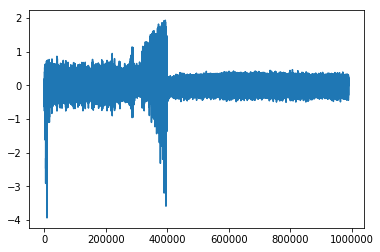

In [37]:
plt.plot(loss_record_3["D"])

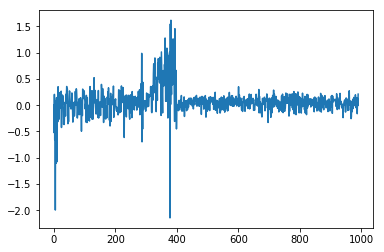

In [38]:
plt.plot(loss_record_3["D"][::1000])

(-1, 1)

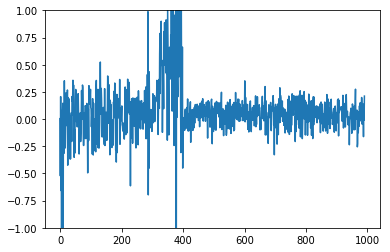

In [39]:
plt.plot(loss_record_3["D"][::1000])
plt.ylim([-1,1])

This looks a lot better (eventually, at least)

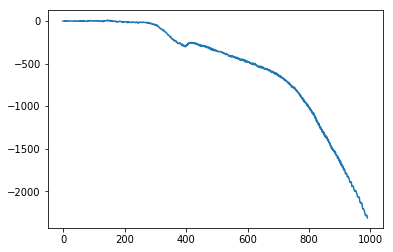

In [41]:
plt.plot(loss_record_3["G"][::200])

Strange that this can happen. In theory it shouldn't matter, so long as the discriminator loss is close to zero (discriminator loss is D(real) - D(fake), generator loss is D(fake) - at the moment we have no constraint on the output of D - maybe we should put in a constraint)

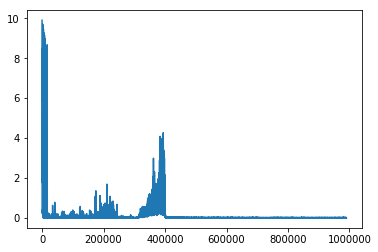

In [47]:
plt.plot(loss_record_3["GP"])

(0, 1.0)

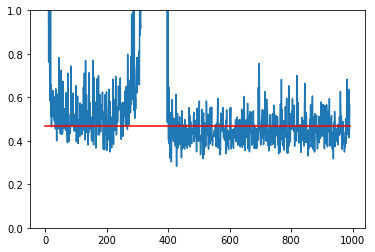

In [48]:
plt.plot(loss_record_3["avg_distance"][::1000])
plt.plot([loss_record_3["avg_distance_empirical"] for _ in range(len(loss_record_3["avg_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

(0, 1.0)

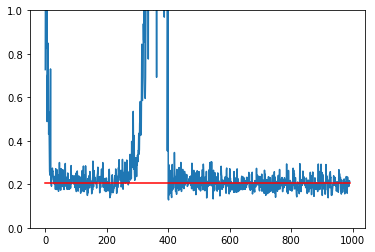

In [50]:
plt.plot(loss_record_3["std_distance"][::1000])
plt.plot([loss_record_3["std_distance_empirical"] for _ in range(len(loss_record_3["std_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

# Experiment 3 - Spectral Normalisation only (no gradient penalty)

In [153]:
loss_record_4 = joblib.load("results/nearby_states/new_SNonly_standarch/losses.pkl")

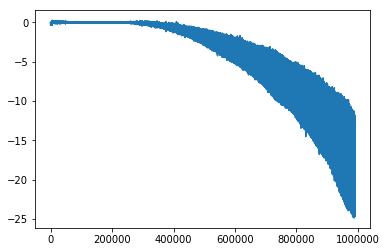

In [154]:
plt.plot(loss_record_4["D"])

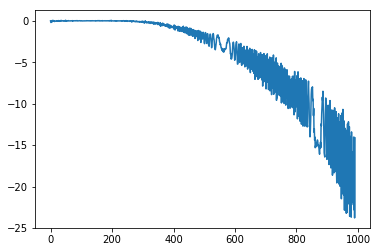

In [54]:
plt.plot(loss_record_4["D"][::1000])

very strange...

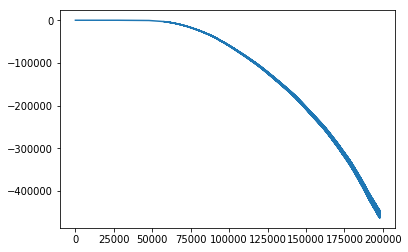

In [55]:
plt.plot(loss_record_4["G"])

OK, clearly here discriminator values are too large

(0, 1.0)

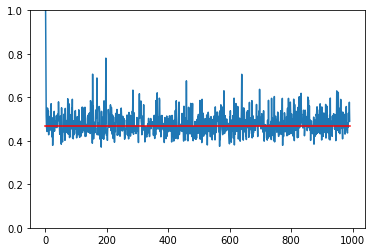

In [56]:
plt.plot(loss_record_4["avg_distance"][::1000])
plt.plot([loss_record_4["avg_distance_empirical"] for _ in range(len(loss_record_4["avg_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

Surprisingly we still seem to get decent results in terms of the average distance from current state to generated states.

(0, 1.0)

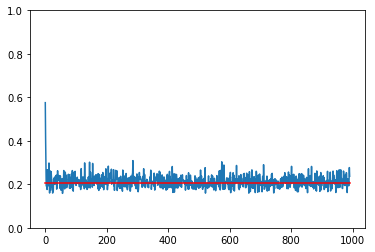

In [57]:
plt.plot(loss_record_4["std_distance"][::1000])
plt.plot([loss_record_4["std_distance_empirical"] for _ in range(len(loss_record_4["std_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

Numerically, results look almost perfect. Need to confirm this visually. But the losses doing what they do concerns mea bit. I think we need to look at constraining the output of the discriminator.

## Experiment 3 - rerun, also monitoring gradient norm

In [107]:
loss_record_4_2 = joblib.load("results/nearby_states/new_SNonly_standarch_2/losses.pkl")

In [108]:
loss_record_4_2.keys()

dict_keys(['big_eval_std_distance', 'avg_distance_empirical', 'big_eval_avg_nn_distance', 'avg_distance', 'big_eval_avg_distance', 'std_distance_empirical', 'std_distance', 'generator_grad_norm', 'G', 'D', 'discriminator_grad_norm'])

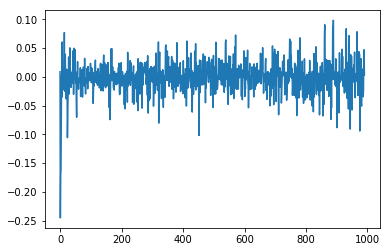

In [122]:
plt.plot(loss_record_4_2["D"][::1000])

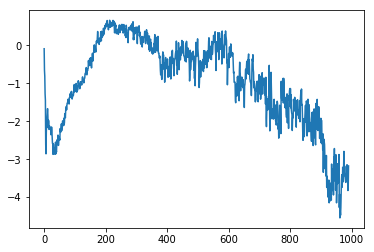

In [123]:
plt.plot(loss_record_4_2["G"][::200])

way more stable this time... surprising!

(0.3, 0.5)

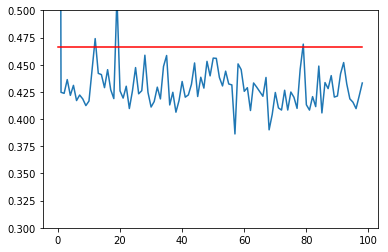

In [127]:
plt.plot(loss_record_4_2["big_eval_avg_distance"])
plt.plot([loss_record_4_2["avg_distance_empirical"] for _ in range(len(loss_record_4_2["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.5])

(0.1, 0.3)

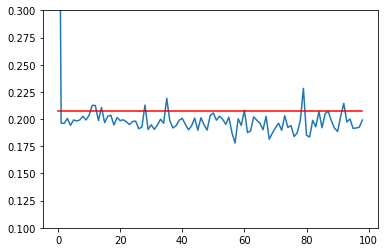

In [126]:
plt.plot(loss_record_4_2["big_eval_std_distance"])
plt.plot([loss_record_4_2["std_distance_empirical"] for _ in range(len(loss_record_4_2["big_eval_std_distance"]))], c="red")
plt.ylim([0.1,0.3])

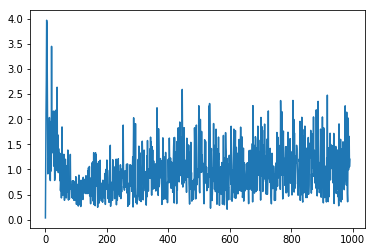

In [129]:
plt.plot(loss_record_4_2["generator_grad_norm"][::200])

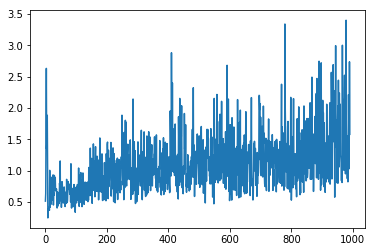

In [130]:
plt.plot(loss_record_4_2["discriminator_grad_norm"][::1000])

Wouldn't say that was obviously concerning

## ## Experiment 3 - rerun #2

In [131]:
loss_record_4_3 = joblib.load("results/nearby_states/new_SNonly_standarch_3/losses.pkl")

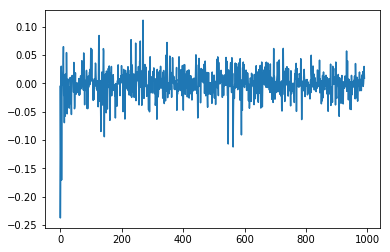

In [133]:
plt.plot(loss_record_4_3["D"][::1000])

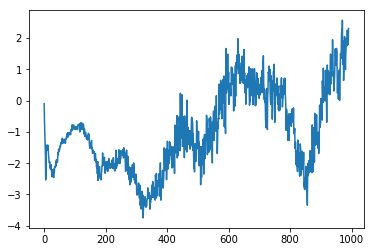

In [134]:
plt.plot(loss_record_4_3["G"][::200])

(0.3, 0.5)

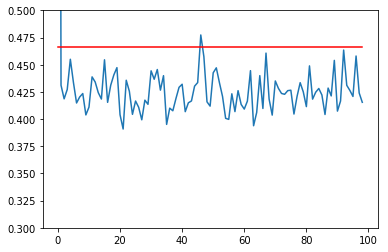

In [135]:
plt.plot(loss_record_4_3["big_eval_avg_distance"])
plt.plot([loss_record_4_3["avg_distance_empirical"] for _ in range(len(loss_record_4_3["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.5])

(0.1, 0.3)

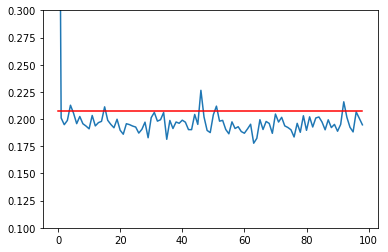

In [137]:
plt.plot(loss_record_4_3["big_eval_std_distance"])
plt.plot([loss_record_4_3["std_distance_empirical"] for _ in range(len(loss_record_4_3["big_eval_std_distance"]))], c="red")
plt.ylim([0.1,0.3])

## Experiment 3 - rerun 3

In [138]:
loss_record_4_4 = joblib.load("results/nearby_states/new_SNonly_standarch_4/losses.pkl")

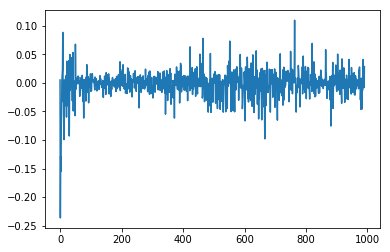

In [139]:
plt.plot(loss_record_4_4["D"][::1000])

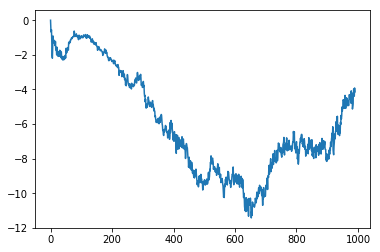

In [140]:
plt.plot(loss_record_4_4["G"][::200])

(0.3, 0.5)

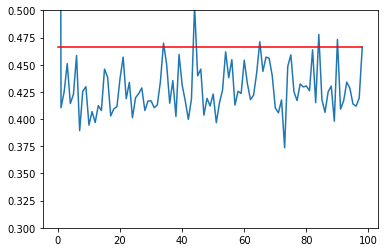

In [141]:
plt.plot(loss_record_4_4["big_eval_avg_distance"])
plt.plot([loss_record_4_4["avg_distance_empirical"] for _ in range(len(loss_record_4_4["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.5])

consistently a little bit low...

(0.1, 0.3)

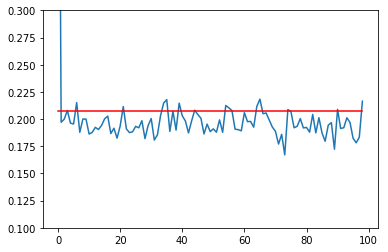

In [142]:
plt.plot(loss_record_4_4["big_eval_std_distance"])
plt.plot([loss_record_4_4["std_distance_empirical"] for _ in range(len(loss_record_4_4["big_eval_std_distance"]))], c="red")
plt.ylim([0.1,0.3])

so first time seems to be an anomaly? Maybe there was some very subtle difference... I'm really not sure

# Experiment 4 - As experiment 1, but with "skip connections" architecture

Add in "skip connections" to the discriminator and generator, so that the current state being conditioned on is provided as input to every layer in the network (inspired by ResNet and also the Pix2Pix conditional GAN approach)

In [59]:
loss_record_5 = joblib.load("results/nearby_states/new_noSN_skipconns/losses.pkl")

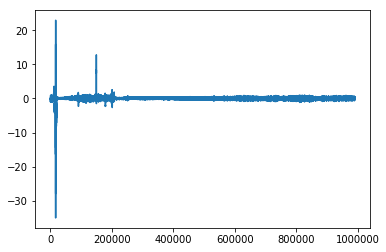

In [60]:
plt.plot(loss_record_5["D"])

(-1, 1)

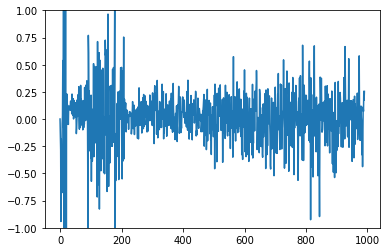

In [61]:
plt.plot(loss_record_5["D"][::1000])
plt.ylim([-1,1])

(-2, 2)

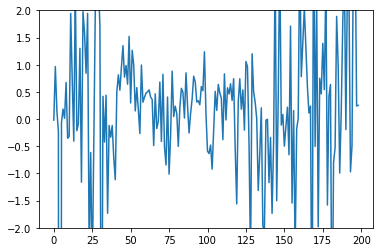

In [66]:
plt.plot(loss_record_5["G"][::1000])
plt.ylim([-2,2])

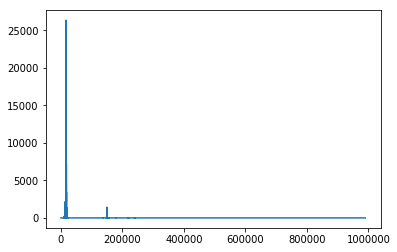

In [67]:
plt.plot(loss_record_5["GP"])

(0, 1.0)

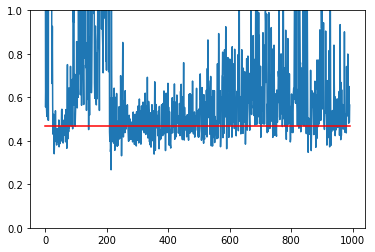

In [68]:
plt.plot(loss_record_5["avg_distance"][::1000])
plt.plot([loss_record_5["avg_distance_empirical"] for _ in range(len(loss_record_5["avg_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

(0, 1.0)

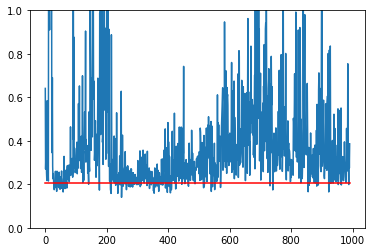

In [70]:
plt.plot(loss_record_5["std_distance"][::1000])
plt.plot([loss_record_5["std_distance_empirical"] for _ in range(len(loss_record_5["std_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

Overall, has essentially the same problems as experiment 1

# Experiment 5 - Spectral normalisation only with skip connections

In [29]:
loss_record_6 = joblib.load("results/nearby_states/new_SNonly_skipconns/losses.pkl")

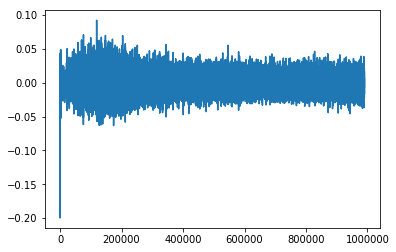

In [73]:
plt.plot(loss_record_6["D"])

So much more stable than any of the other approaches. Much less noise in the discriminator loss

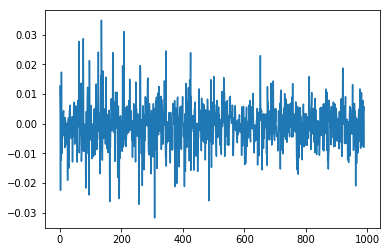

In [74]:
plt.plot(loss_record_6["D"][::1000])

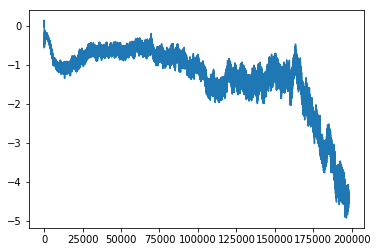

In [75]:
plt.plot(loss_record_6["G"])

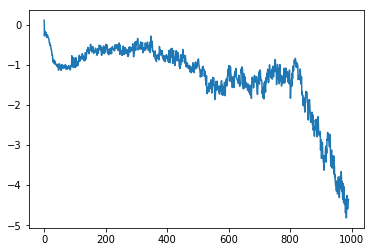

In [76]:
plt.plot(loss_record_6["G"][::200])

hmmmmm, interesting that it still ends up falling off. I think we should probably still think about clamping the discriminator value in some way for even better stability.

(0, 1.0)

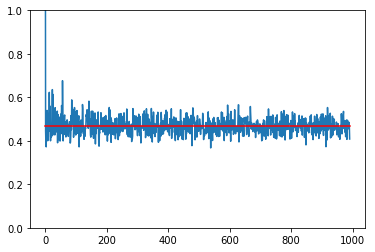

In [77]:
plt.plot(loss_record_6["avg_distance"][::1000])
plt.plot([loss_record_6["avg_distance_empirical"] for _ in range(len(loss_record_6["avg_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

looks pretty much spot on.

(0, 1.0)

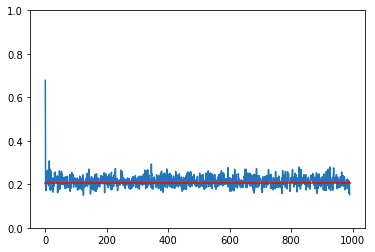

In [78]:
plt.plot(loss_record_6["std_distance"][::1000])
plt.plot([loss_record_6["std_distance_empirical"] for _ in range(len(loss_record_6["std_distance"][::1000]))], c="red")
plt.ylim([0,1.0])

In [30]:
loss_record_6.keys()

dict_keys(['big_eval_avg_distance', 'G', 'avg_distance_empirical', 'std_distance', 'avg_distance', 'big_eval_avg_nn_distance', 'D', 'big_eval_std_distance', 'std_distance_empirical'])

(0, 1.0)

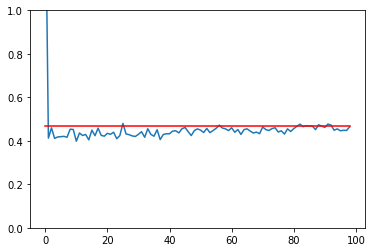

In [32]:
plt.plot(loss_record_6["big_eval_avg_distance"])
plt.plot([loss_record_6["avg_distance_empirical"] for _ in range(len(loss_record_6["big_eval_avg_distance"]))], c="red")
plt.ylim([0,1.0])

## Experiment 5 re-run 1

In [143]:
loss_record_6_2 = joblib.load("results/nearby_states/new_SNonly_skipconns_2/losses.pkl")

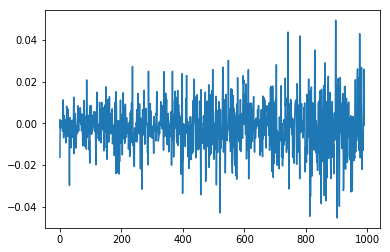

In [145]:
plt.plot(loss_record_6_2["D"][::1000])

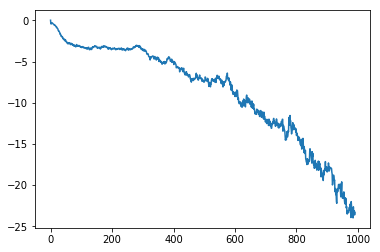

In [146]:
plt.plot(loss_record_6_2["G"][::200])

(0.3, 0.5)

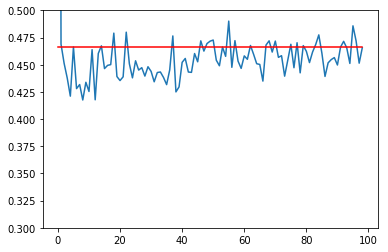

In [148]:
plt.plot(loss_record_6_2["big_eval_avg_distance"])
plt.plot([loss_record_6_2["avg_distance_empirical"] for _ in range(len(loss_record_6_2["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.5])

## Experiment 5 - rerun 2

In [149]:
loss_record_6_3 = joblib.load("results/nearby_states/new_SNonly_skipconns_3/losses.pkl")

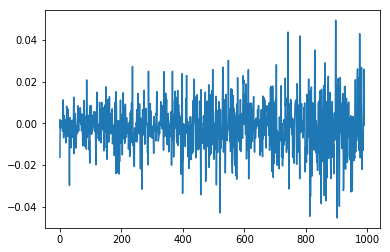

In [150]:
plt.plot(loss_record_6_2["D"][::1000])

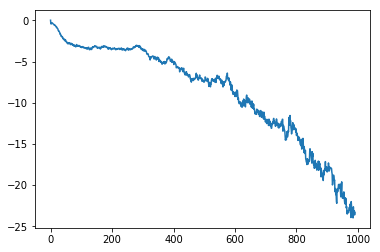

In [151]:
plt.plot(loss_record_6_2["G"][::200])

(0.3, 0.5)

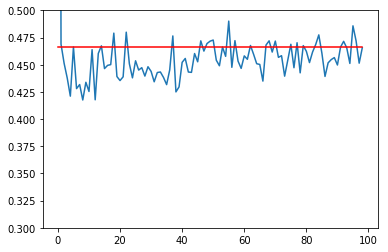

In [152]:
plt.plot(loss_record_6_2["big_eval_avg_distance"])
plt.plot([loss_record_6_2["avg_distance_empirical"] for _ in range(len(loss_record_6_2["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.5])

# Looking at results visually

In [49]:
from networks.networks import Generator, Discriminator, Generator_alt, Discriminator_alt
import warnings
warnings.filterwarnings("ignore")

In [50]:
data = joblib.load("data_nearby_states.pkl")

In [51]:
state_dim = 3; num_trajs = 10000; traj_length=100;
scaler = StandardScaler()
data = scaler.fit_transform(data.reshape(-1, state_dim)).reshape(num_trajs, traj_length, state_dim)

In [10]:
data.shape

(10000, 100, 3)

In [11]:
latent_dim = 64
tau = 5

### Experiment 3 (standard, SN only)

In [12]:
device = "cuda"
netG_1 = Generator(state_dim, latent_dim, state_dim, batch_norm=True, hidden_sizes=[128, 256, 512]).to(device)
netD_1 = Discriminator(state_dim, spectral_norm=True, hidden_sizes=[512, 256, 128]).to(device)

In [13]:
dict_G, dict_D = joblib.load("results/nearby_states/new_SNonly_standarch/parameters.pkl")
netG_1.load_state_dict(dict_G)
netD_1.load_state_dict(dict_D)

netG_1.eval()

Generator(
  (model): Sequential(
    (0): Linear(in_features=67, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=512, bias=True)
    (7): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Linear(in_features=512, out_features=3, bias=True)
  )
)

In [14]:
def sample_batch(size):
    traj_ind = np.random.randint(0, num_trajs, size)
    state_ind = np.random.randint(0, traj_length-tau, size)
    future_state_ind = state_ind + tau
    return torch.tensor(data[traj_ind, state_ind, ...], dtype=torch.float32).to(device), \
           torch.tensor(data[traj_ind, future_state_ind, ...], dtype=torch.float32).to(device)

In [15]:
batch_size = 500; num_future_states = 100;
states, _ = sample_batch(batch_size)
states = states.unsqueeze(1).repeat(1, num_future_states, 1).view(-1, state_dim)
z = torch.randn(states.size(0), latent_dim).to(device)
gen_future_states = netG_1(z, states)
distances = (states-gen_future_states).norm(dim=-1)
avg_dist = distances.mean().item()

<IPython.core.display.Javascript object>


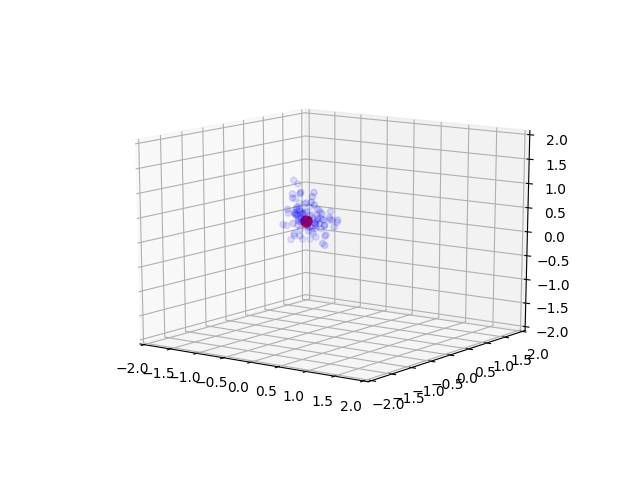

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


In [19]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gen_future_states[:num_future_states,0].cpu().data.numpy(), gen_future_states[:num_future_states,1].cpu().data.numpy(), gen_future_states[:num_future_states,2].cpu().data.numpy(),
          c=[0,0,1,0.2]);
ax.scatter(states[0,0].cpu().data.numpy(),states[0,1].cpu().data.numpy(), states[0,2].cpu().data.numpy(), s=60, c="red");
ax.set_xlim(-2,2);
ax.set_ylim(-2,2);
ax.set_zlim(-2,2);

In [20]:
np.mean(distances.cpu().data.numpy())

0.4072219

In [21]:
np.std(distances.cpu().data.numpy())

0.19456863

In [24]:
loss_record_4["avg_distance_empirical"]

0.4666842787609641

In [25]:
loss_record_4["std_distance_empirical"]

0.20705606093445894

<IPython.core.display.Javascript object>


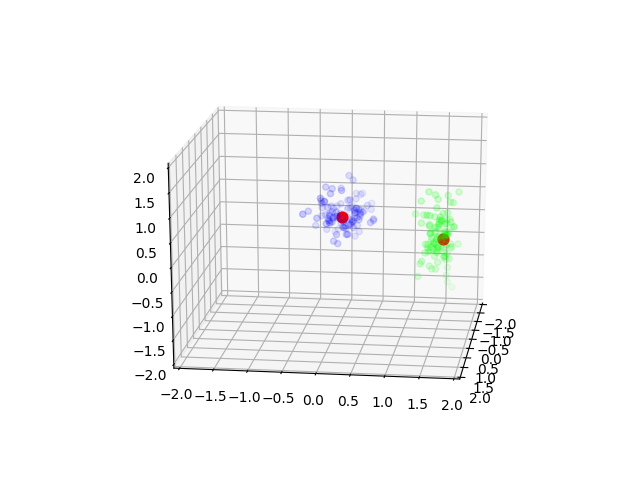

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


(-2, 2)

In [26]:
s2_ind = 6

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gen_future_states[:num_future_states,0].cpu().data.numpy(), gen_future_states[:num_future_states,1].cpu().data.numpy(), gen_future_states[:num_future_states,2].cpu().data.numpy(),
          c=[0,0,1,0.2])
ax.scatter(states[0,0].cpu().data.numpy(),states[0,1].cpu().data.numpy(), states[0,2].cpu().data.numpy(), s=60, c="red")

ax.scatter(states[s2_ind*num_future_states,0].cpu().data.numpy(),states[s2_ind*num_future_states,1].cpu().data.numpy(), states[s2_ind*num_future_states,2].cpu().data.numpy(), s=60, c="red")
ax.scatter(gen_future_states[(s2_ind*num_future_states):(s2_ind+1)*num_future_states,0].cpu().data.numpy(), gen_future_states[(s2_ind*num_future_states):(s2_ind+1)*num_future_states,1].cpu().data.numpy(), gen_future_states[(s2_ind*num_future_states):(s2_ind+1)*num_future_states,2].cpu().data.numpy(),
          c=[0,1,0,0.2])

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

more general:

<IPython.core.display.Javascript object>


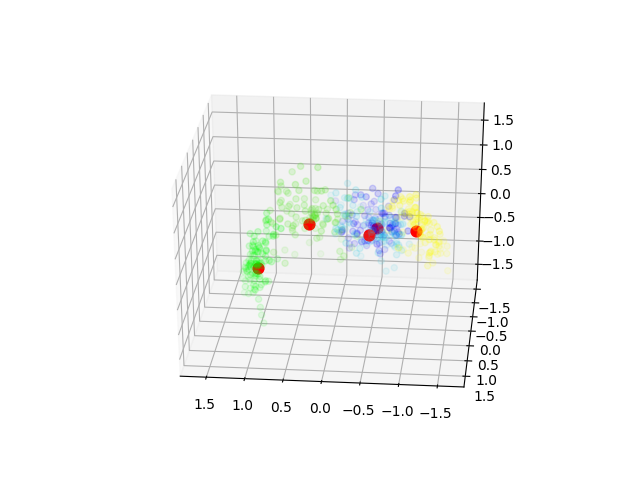

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(-2, 2)

In [27]:
inds = [0, 6, 9, 10, 15]
colors = [[0,0,1,0.2], [0,1,0,0.2], [1,1,0,0.2], [0.2, 0.8, 0.9, 0.2], [0.3, 0.9, 0.1, 0.2]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, ind in enumerate(inds):
    ax.scatter(states[ind*num_future_states, 0].cpu().data.numpy(), states[ind*num_future_states, 1].cpu().data.numpy(),
              states[ind*num_future_states, 2].cpu().data.numpy(), s=60, c="red")
    ax.scatter(gen_future_states[(ind*num_future_states):(ind+1)*num_future_states, 0].cpu().data.numpy(),
               gen_future_states[(ind*num_future_states):(ind+1)*num_future_states, 1].cpu().data.numpy(),
               gen_future_states[(ind*num_future_states):(ind+1)*num_future_states, 2].cpu().data.numpy(),
               c = colors[i])

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

Generally now all looks sensible!

We should compare with empirical results though

In [80]:
env = FetchReachMod()

In [81]:
env.reset()
for _ in range(1000):
    env.step(env.action_space.sample())
g = env._get_obs()["achieved_goal"]
saved_state = env.save_state()

In [82]:
init_state = scaler.transform(g.reshape(1, -1))

In [83]:
init_state

array([[-0.98141263, -0.37760758, -1.10599376]])

In [84]:
future_states = np.zeros((num_future_states, 3))
for i in range(num_future_states):
    env.restore_state(saved_state)
    for ts in range(tau):
        env.step(env.action_space.sample())
    future_states[i, :] = env._get_obs()["achieved_goal"]

In [85]:
future_states = scaler.transform(future_states)

In [86]:
state = torch.tensor(init_state[0], dtype=torch.float32).repeat(num_future_states, 1).to(device)

In [87]:
z = torch.randn(num_future_states, latent_dim).to(device)

In [88]:
gen_future_states = netG_1(z, state)

In [89]:
gen_future_states = gen_future_states.cpu().data.numpy()
state = state.cpu().data.numpy()

<IPython.core.display.Javascript object>


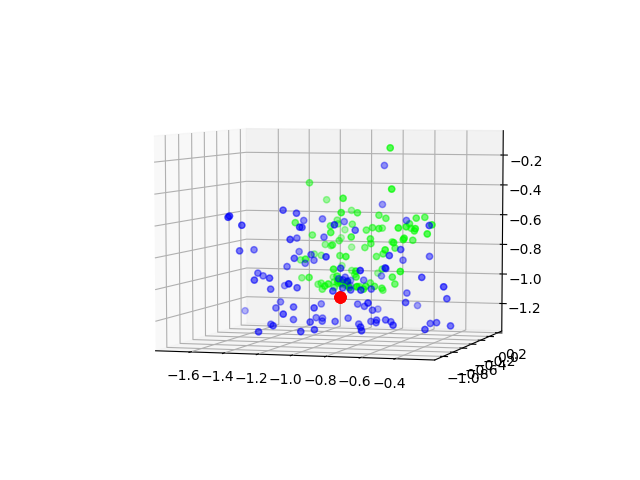

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, ind in enumerate(inds):
    ax.scatter(state[0,0], state[0,1], state[0,2], s=60, c="red")
    ax.scatter(gen_future_states[:,0], gen_future_states[:,1], gen_future_states[:,2], c=[0,1,0,0.2])
    ax.scatter(future_states[:,0], future_states[:,1], future_states[:,2], c=[0,0,1,0.2])

Interesting, seems to be much less variation in the generated states, despite the fact that the avg/std distances are very good (green is generated states, blue are empirical)

Is this still the case with the more stable result?

### Experiment 5 (SN only with skip connections)

In [98]:
netG_2 = Generator_alt(state_dim, latent_dim, state_dim, batch_norm=True, hidden_sizes=[128, 256, 512]).to(device)
netD_2 = Discriminator_alt(state_dim, spectral_norm=True, hidden_sizes=[512, 256, 128]).to(device)
dict_G, dict_D = joblib.load("results/nearby_states/new_SNonly_skipconns/parameters.pkl")
netG_2.load_state_dict(dict_G)
netD_2.load_state_dict(dict_D)
netG_2.eval()

Generator_alt(
  (blocks): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=67, out_features=128, bias=True)
      (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): Sequential(
      (0): Linear(in_features=131, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=259, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
  )
  (out_layer): Linear(in_features=515, out_features=3, bias=True)
)

In [99]:
batch_size = 500; num_future_states = 100;
states, _ = sample_batch(batch_size)
states = states.unsqueeze(1).repeat(1, num_future_states, 1).view(-1, state_dim)
z = torch.randn(states.size(0), latent_dim).to(device)
gen_future_states = netG_2(z, states)
distances = (states-gen_future_states).norm(dim=-1)
avg_dist = distances.mean().item()

In [100]:
np.mean(distances.cpu().data.numpy())

0.43932095

In [101]:
np.std(distances.cpu().data.numpy())

0.22762391

In [102]:
loss_record_4["avg_distance_empirical"]

0.4666842787609641

In [103]:
loss_record_4["std_distance_empirical"]

0.20705606093445894

<IPython.core.display.Javascript object>


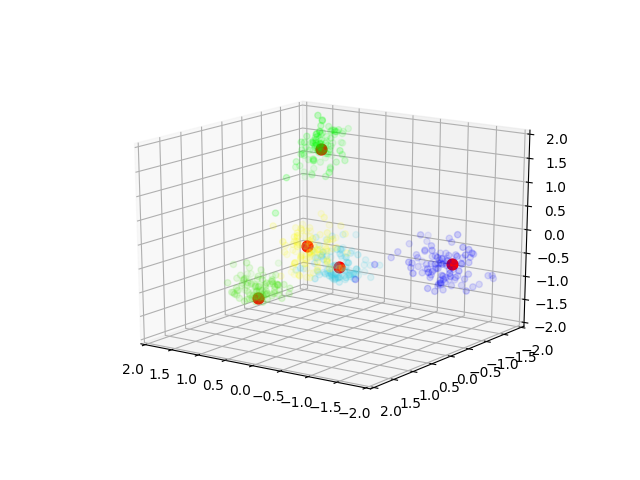

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

(-2, 2)

In [104]:
#inds = [0, 6, 9, 10, 15]
inds = [1, 7, 8, 11, 16]
colors = [[0,0,1,0.2], [0,1,0,0.2], [1,1,0,0.2], [0.2, 0.8, 0.9, 0.2], [0.3, 0.9, 0.1, 0.2]]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, ind in enumerate(inds):
    ax.scatter(states[ind*num_future_states, 0].cpu().data.numpy(), states[ind*num_future_states, 1].cpu().data.numpy(),
              states[ind*num_future_states, 2].cpu().data.numpy(), s=60, c="red")
    ax.scatter(gen_future_states[(ind*num_future_states):(ind+1)*num_future_states, 0].cpu().data.numpy(),
               gen_future_states[(ind*num_future_states):(ind+1)*num_future_states, 1].cpu().data.numpy(),
               gen_future_states[(ind*num_future_states):(ind+1)*num_future_states, 2].cpu().data.numpy(),
               c = colors[i])

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

Again seems fine, let's compare vs empirical.

In [105]:
env = FetchReachMod()
env.reset()
for _ in range(1000):
    env.step(env.action_space.sample())
g = env._get_obs()["achieved_goal"]
saved_state = env.save_state()
init_state = scaler.transform(g.reshape(1, -1))

future_states = np.zeros((num_future_states, 3))
for i in range(num_future_states):
    env.restore_state(saved_state)
    for ts in range(tau):
        env.step(env.action_space.sample())
    future_states[i, :] = env._get_obs()["achieved_goal"]

future_states = scaler.transform(future_states)
state = torch.tensor(init_state[0], dtype=torch.float32).repeat(num_future_states, 1).to(device)
z = torch.randn(num_future_states, latent_dim).to(device)
gen_future_states = netG_2(z, state)
gen_future_states = gen_future_states.cpu().data.numpy()
state = state.cpu().data.numpy()

<IPython.core.display.Javascript object>


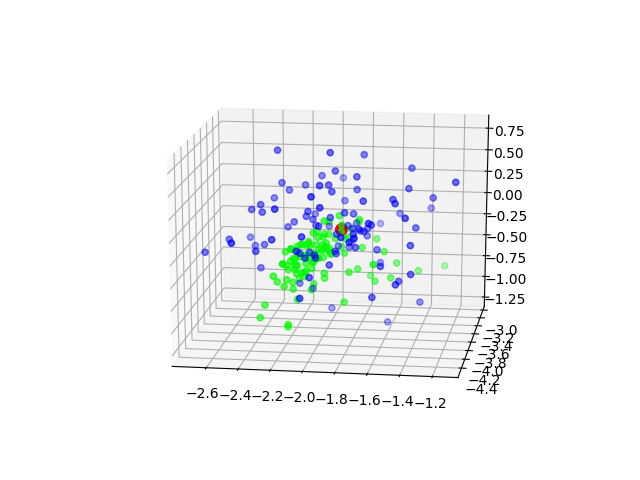

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [106]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, ind in enumerate(inds):
    ax.scatter(state[0,0], state[0,1], state[0,2], s=60, c="red")
    ax.scatter(gen_future_states[:,0], gen_future_states[:,1], gen_future_states[:,2], c=[0,1,0,0.2])
    ax.scatter(future_states[:,0], future_states[:,1], future_states[:,2], c=[0,0,1,0.2])

still seem to get the same kind of mode collapse. hmmmm. Also seem to much more regularly get big outliers... this is a bit of an issue, because it's not anything like full mode collapse, but it definitely isn't capturing the full distribution.

# Experiment 6 - constraining generator output with tanh

Apply 3*tanh() to output of Generator, so constrained to generate states in range [-3,3]. Skipconns SN only (new "standard" settings

In [3]:
loss_record_7 = joblib.load("results/nearby_states/new_SNonly_skipconns_3tanhgen/losses.pkl")

In [4]:
loss_record_7.keys()

dict_keys(['discriminator_grad_norm', 'G', 'big_eval_avg_nn_distance', 'avg_distance_empirical', 'D', 'big_eval_avg_distance', 'std_distance', 'generator_grad_norm', 'std_distance_empirical', 'avg_distance', 'big_eval_std_distance'])

In [5]:
loss_record_7["avg_distance_empirical"]

0.4666842787609641

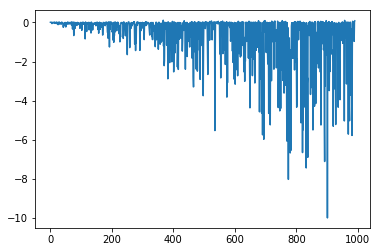

In [7]:
plt.plot(loss_record_7["D"][::1000])

(-2, 0.5)

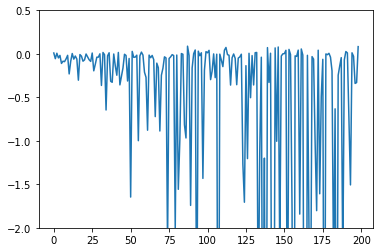

In [12]:
plt.plot(loss_record_7["D"][::5000])
plt.ylim([-2,0.5])

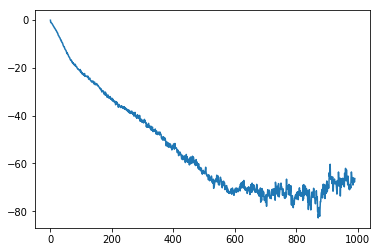

In [8]:
plt.plot(loss_record_7["G"][::200])

curious why this makes a difference...

(0.3, 0.5)

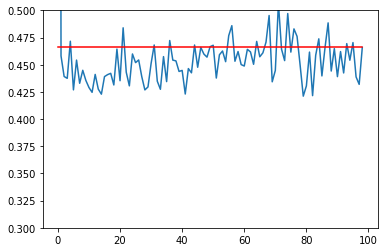

In [15]:
plt.plot(loss_record_7["big_eval_avg_distance"])
plt.plot([loss_record_7["avg_distance_empirical"] for _ in range(len(loss_record_7["big_eval_avg_distance"]))], c="red")
plt.ylim([0.3,0.5])

still relatively sensible, all things considered.

should try a re-run and see if this still happens...